In [3]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:,2:4]
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<function matplotlib.pyplot.show(close=None, block=None)>

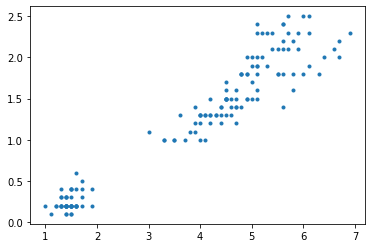

In [6]:
import matplotlib.pyplot as plt

plt.scatter (X[:,0], X[:,1], marker = ".")
plt.show

In [29]:
from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin
import numpy as np
import random

class KMeans(BaseEstimator, ClusterMixin, TransformerMixin):
    
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters
    
    def _init_centroids(self, X):
        min = np.min(X, axis=0)
        max = np.max(X, axis=0)
        centroids = []
        for i in range(self.n_clusters):
            centroid = []
            for j in range(X.shape[1]):
                centroid.append(random.uniform(min[j], max[j]))
            centroids.append(centroid)
        self.cluster_centers_ = np.array(centroids)

In [30]:
    def fit(self, X, y=None):
        self._init_centroids(X)
        previous_centroids = self.cluster_centers_.copy()                               #copia de objeto para evitar a ligacao entre os objetos
        while True:
            ypred = self.predict(X)
            for i in range(self.n_clusters):                                            #determinando o centro de cada cluster
                if np.any(ypred==i):                                                    #considera todo cluster, mesmo com conjunto vazio
                    self.cluster_centers_[i] = np.mean(X[ypred==i], axis=0)             #a media de todos os valores do eixo
            if np.allclose(previous_centroids, self.cluster_centers_, atol=0.0001):     
                break
            previous_centroids = self.cluster_centers_.copy()

In [31]:
    def predict(self, X):
        ypred = np.empty((X.shape[0],))
        for i in range(X.shape[0]):
            distancias = self._distancias(X[i])
            centroid = np.argmin(distancias)
            ypred[i] = centroid
        return ypred

In [32]:
    def _distancias(self, X):                                                           #calcular distancia
        diferenca = self.cluster_centers_ - X
        quadrado = diferenca ** 2
        soma = np.sum(quadrado, axis=1)
        raiz = np.sqrt(soma)
        return raiz

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[5.59583333 2.0375    ]
 [1.462      0.246     ]
 [4.26923077 1.34230769]]
